# Q6

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data0 = np.loadtxt("data0.txt")
X0 = data0[:,:2]
y0 = data0[:,-1]
print(X0.shape, y0.shape)

(48, 2) (48,)


In [28]:
def converged(w, b, X, y):
  predictions = np.argmax((X @ w) + b.reshape((1, -1)), axis=1)
  return np.allclose(predictions, y)
def perceptron(X, y):
  num_classes = len(np.unique(y))
  n = X.shape[0]
  w = np.zeros((X.shape[1], num_classes))
  b = np.zeros(num_classes)

  perm = np.random.choice(range(n), n, replace=False)
  X_perm = X[perm]
  y_perm = y[perm]
  num_iterations = 0
  max_iterations = 999
  while not converged(w, b, X, y) and num_iterations < max_iterations:
    for i in range(n):
      Xi = X_perm[i]
      yi = int(y_perm[i])
      y_pred = int(np.argmax(Xi.reshape((1, -1)) @ w + b))
      if yi != y_pred:
        w[:,yi] += Xi
        b[yi] += 1
        w[:,y_pred] -= Xi
        b[y_pred] -= 1
    num_iterations += 1
  return w, b
def plot0(X, y, w, b):
  min_x1, max_x1 = np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5
  min_x2, max_x2 = np.min(X[:,1]) - 0.5, np.max(X[:,1]) + 0.5
  delta = 0.1

  plt.xlim(min_x1, max_x1)
  plt.ylim(min_x2, max_x2)

  xx, yy = np.meshgrid(np.arange(min_x1, max_x1 + delta, delta), np.arange(min_x2, max_x2 + delta, delta))
  pairs = np.c_[xx.flatten(), yy.flatten()]
  zz = np.zeros(len(pairs))
  for i, pair in enumerate(pairs):
    pair2 = pair.reshape((1, -1))
    zz[i] = np.argmax((pair2 @ w ).flatten() + b)
  zz = zz.reshape(xx.shape)
  styles = ["^r", "og", "pb", "*m"]
  for i in range(4):
    Xi, yi = X[y==i], y[y==i]
    plt.plot(Xi[:,0], Xi[:,1], styles[i])
  plt.pcolormesh(xx, yy, zz, cmap="rainbow", vmin=0, vmax=4)
  plt.show()

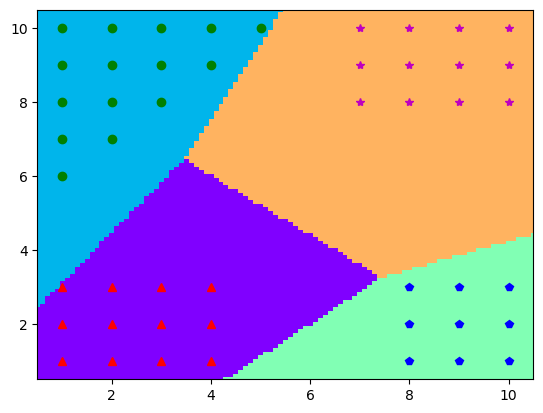

In [29]:
np.random.seed(123)

w, b = perceptron(X0, y0)
plot0(X0, y0, w, b)

# Q7

In [30]:
data1 = np.loadtxt("data1.txt")
data2 = np.loadtxt("data2.txt")

X1, y1 = data1[:,:-1], data1[:,-1]
X2, y2 = data2[:,:-1], data2[:,-1]
print(X1.shape, X2.shape, y1.shape, y2.shape)

(76, 2) (60, 2) (76,) (60,)


In [54]:
def kernel_classify(b, X, x, y, alpha):
  terms = alpha.flatten() * y.flatten()
  dots = ((1 + X @ x.reshape((-1, 1))) ** 2).flatten()
  w_dot_phi = np.dot(terms, dots)
  decision = w_dot_phi + b
  return np.sign(decision)

def kernel_converge(b, X, y, alpha):
  dot_matrix = (1 + X @ X.T) ** 2
  column_terms = (alpha * y).reshape((-1, 1))

  logit_matrix = dot_matrix * column_terms
  predictions = np.sum(logit_matrix, axis=0) + b

  return np.allclose(np.sign(predictions), y)

def kernel_perceptron(X, y):
  n, d = X.shape
  alpha = np.zeros(n)
  b = 0

  perm = np.random.choice(n, n, replace=False)
  X_perm = X[perm]
  y_perm = y[perm]

  for i in range(999):
    for j in range(n):
      xj = X_perm[j]
      yj = y_perm[j]
      if kernel_classify(b, X, xj, y, alpha) != yj:
        alpha[j] += 1
        b += yj
    if kernel_converge(b, X, y, alpha):
      return alpha, b
  print("Did not converge")
  return alpha, b
  

def gen_classify(alpha, b, X, y):
  def clas(x):
    phis = ((1 + X @ x.reshape((-1, 1))) ** 2).flatten()
    decision = np.sum(alpha * y * phis) + b
    return np.sign(decision)
  return clas

def plot1(X, y, classify, title=""):
  min_x1, max_x1 = np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5
  min_x2, max_x2 = np.min(X[:,1]) - 0.5, np.max(X[:,1]) + 0.5
  delta = 0.1

  plt.xlim(min_x1, max_x1)
  plt.ylim(min_x2, max_x2)

  xx, yy = np.meshgrid(np.arange(min_x1, max_x1 + delta, delta), np.arange(min_x2, max_x2 + delta, delta))
  pairs = np.c_[xx.flatten(), yy.flatten()]
  zz = np.zeros(len(pairs))
  for i, pair in enumerate(pairs):
    pair2 = pair.reshape((1, -1))
    zz[i] = classify(pair)
  zz = zz.reshape(xx.shape)
  styles = ["^r", "og"]
  for idx, label in enumerate([-1, 1]):
    Xi, yi = X[y==label], y[y==label]
    plt.plot(Xi[:,0], Xi[:,1], styles[idx])
  plt.pcolormesh(xx, yy, zz, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
  if title:
    plt.title(title)
  plt.show()

Did not converge


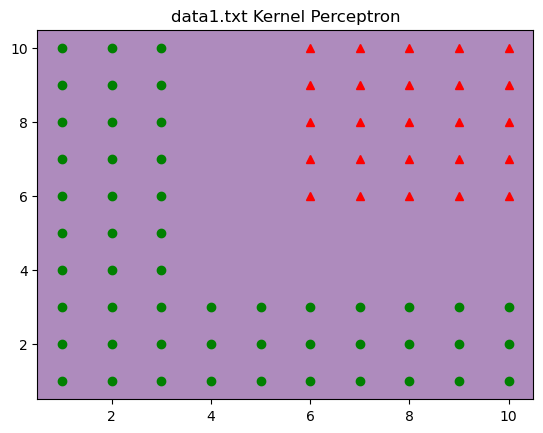

In [55]:
alpha, b = kernel_perceptron(X1, y1)
clas = gen_classify(alpha, b, X1, y1)
plot1(X1, y1, clas, title = "data1.txt Kernel Perceptron")